# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv("/content/forestfires.csv")
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [5]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
#Preprocessing the data
X = data.drop(columns=['area', 'size_category'])
y = data['area']

In [8]:
#One-hot encode categorical variables
categorical_cols = ['month', 'day']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

In [9]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [10]:
#Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#Reshaping input data for RNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [14]:
# Define the RNN model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [15]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
13/13 [==============================] - 2s 18ms/step - loss: 2201.1279
Epoch 2/50
13/13 [==============================] - 0s 18ms/step - loss: 257503.2500
Epoch 3/50
13/13 [==============================] - 0s 19ms/step - loss: 2214.7952
Epoch 4/50
13/13 [==============================] - 0s 18ms/step - loss: 2200.4216
Epoch 5/50
13/13 [==============================] - 0s 19ms/step - loss: 2195.1819
Epoch 6/50
13/13 [==============================] - 0s 19ms/step - loss: 2193.0205
Epoch 7/50
13/13 [==============================] - 0s 19ms/step - loss: 2191.8066
Epoch 8/50
13/13 [==============================] - 0s 20ms/step - loss: 2190.4641
Epoch 9/50
13/13 [==============================] - 0s 18ms/step - loss: 2189.5081
Epoch 10/50
13/13 [==============================] - 0s 18ms/step - loss: 2188.4067
Epoch 11/50
13/13 [==============================] - 0s 20ms/step - loss: 2187.3020
Epoch 12/50
13/13 [==============================] - 0s 29ms/step - loss: 2186.2769

In [16]:
#Evaluating the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

4/4 [==============================] - 0s 10ms/step
Mean Squared Error: 11896.83481292634


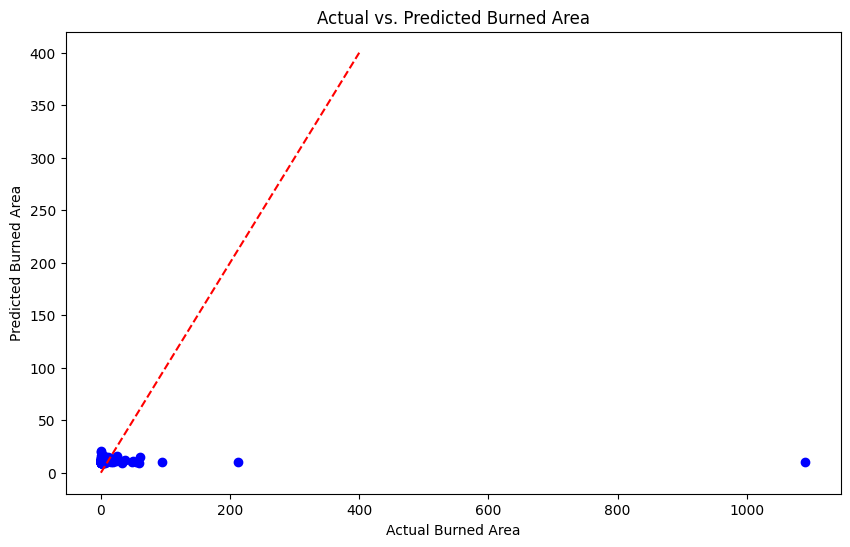

In [17]:
#Visualizing the predicted vs actual burned area
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 400], [0, 400], color='red', linestyle='--')
plt.xlabel('Actual Burned Area')
plt.ylabel('Predicted Burned Area')
plt.title('Actual vs. Predicted Burned Area')
plt.show()

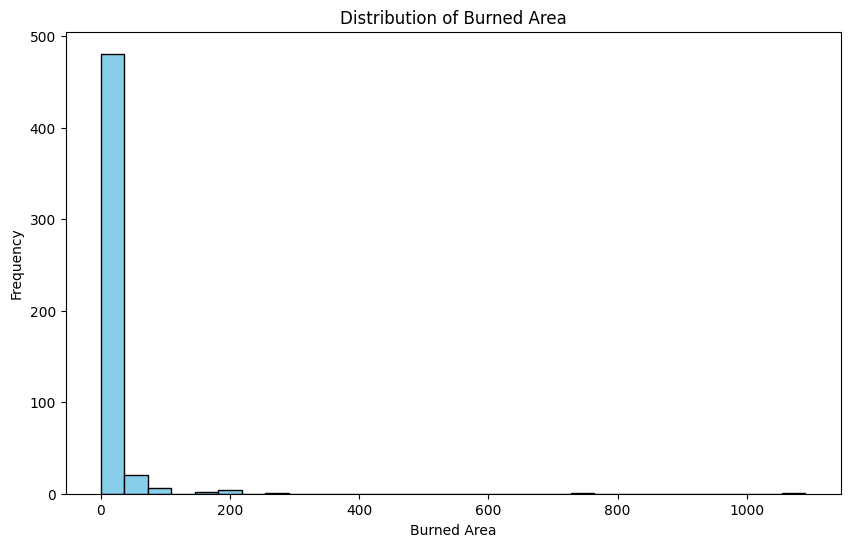

In [18]:
#histogram for the 'area' (burned area) column
plt.figure(figsize=(10, 6))
plt.hist(data['area'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Burned Area')
plt.ylabel('Frequency')
plt.title('Distribution of Burned Area')
plt.show()

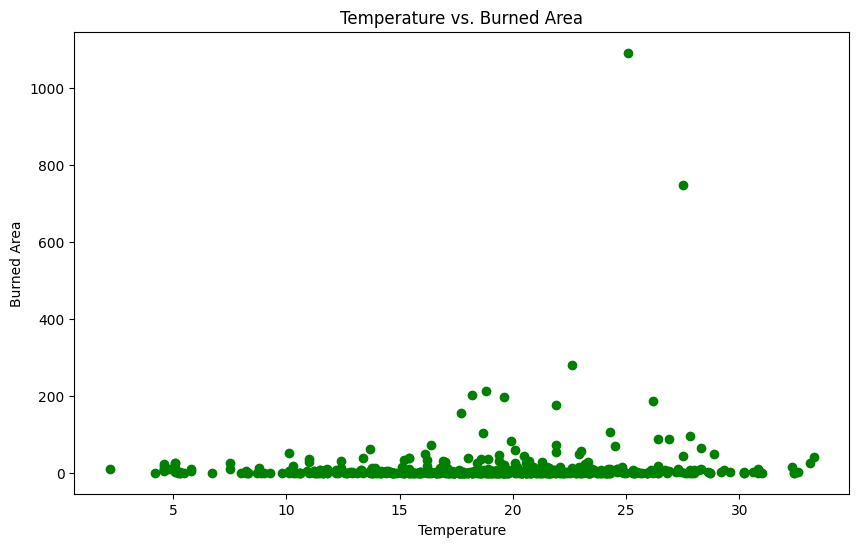

In [19]:
#scatter plot for 'temp' (temperature) vs. 'area' (burned area)
plt.figure(figsize=(10, 6))
plt.scatter(data['temp'], data['area'], color='green')
plt.xlabel('Temperature')
plt.ylabel('Burned Area')
plt.title('Temperature vs. Burned Area')
plt.show()

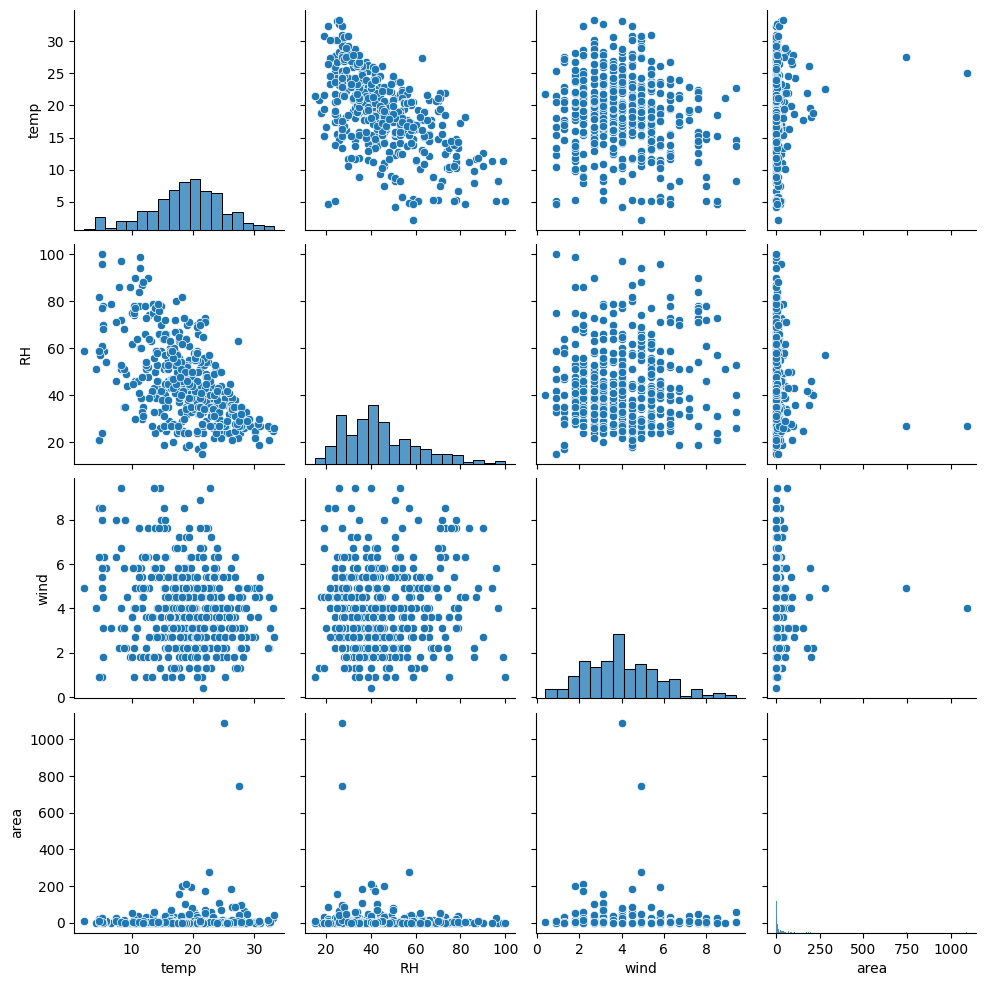

In [20]:
#Pair plot for selected numerical columns
selected_columns = ['temp', 'RH', 'wind', 'area']
sns.pairplot(data[selected_columns])
plt.show()

Insights

The LSTM model trained for predicting forest fire burned areas shows signs of learning with fluctuating loss over epochs, yet it exhibits high mean squared error of 11896.83, indicating significant inaccuracies in predicting burned areas. The dataset's histogram reveals a skewed distribution, with most areas burned being small. Additionally, the scatter plot depicting temperature against burned area shows no clear trend, suggesting that temperature alone may not be a strong predictor. The pair plot of selected variables against burned area also fails to show strong linear relationships.

# predicting turbine energy yield (TEY) using ambient variables as features.


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("/content/gas_turbines.csv")
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [23]:
#Droping any rows with missing values
df.dropna(inplace=True)

In [24]:
#Separating features and target variable
X = df.drop(columns=['TEY'])
y = df['TEY']

In [25]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
#Reshaping the input data for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [28]:
#LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [29]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
376/376 [==============================] - 5s 7ms/step - loss: 2752.3948
Epoch 2/50
376/376 [==============================] - 2s 6ms/step - loss: 46.8453
Epoch 3/50
376/376 [==============================] - 2s 6ms/step - loss: 31.8668
Epoch 4/50
376/376 [==============================] - 3s 7ms/step - loss: 27.0193
Epoch 5/50
376/376 [==============================] - 2s 7ms/step - loss: 20.1608
Epoch 6/50
376/376 [==============================] - 2s 6ms/step - loss: 15.2988
Epoch 7/50
376/376 [==============================] - 2s 6ms/step - loss: 14.3399
Epoch 8/50
376/376 [==============================] - 2s 6ms/step - loss: 10.7828
Epoch 9/50
376/376 [==============================] - 4s 10ms/step - loss: 9.2322
Epoch 10/50
376/376 [==============================] - 3s 9ms/step - loss: 7.4532
Epoch 11/50
376/376 [==============================] - 3s 8ms/step - loss: 7.5595
Epoch 12/50
376/376 [==============================] - 2s 6ms/step - loss: 5.0724
Epoch 13/50
37

In [30]:
#Evaluating the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

94/94 [==============================] - 0s 3ms/step
Mean Squared Error: 0.5170677943892306


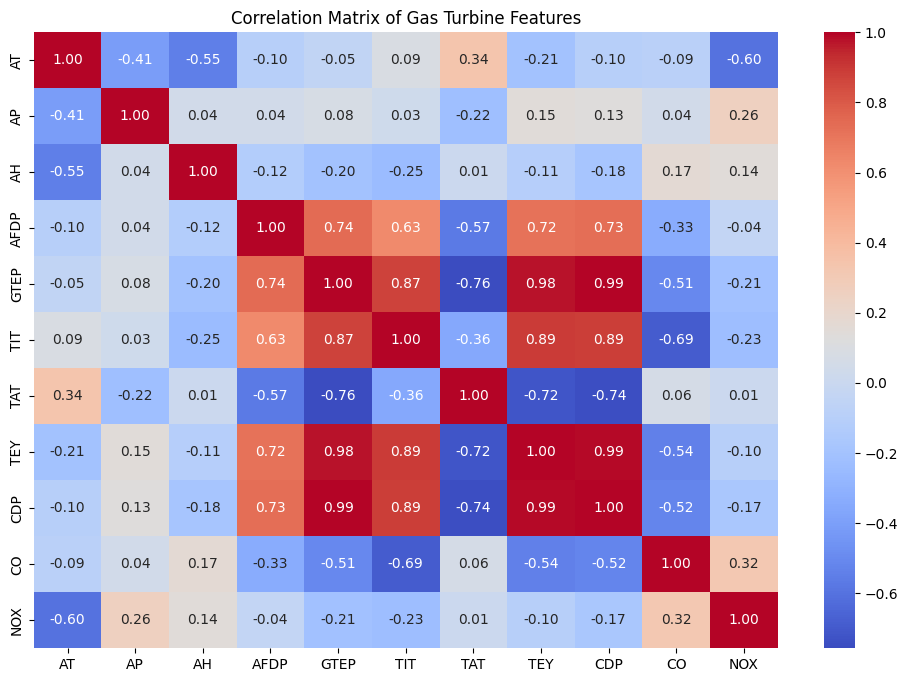

In [31]:
#Visualizing the relationship between features and turbine energy yield
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Gas Turbine Features')
plt.show()

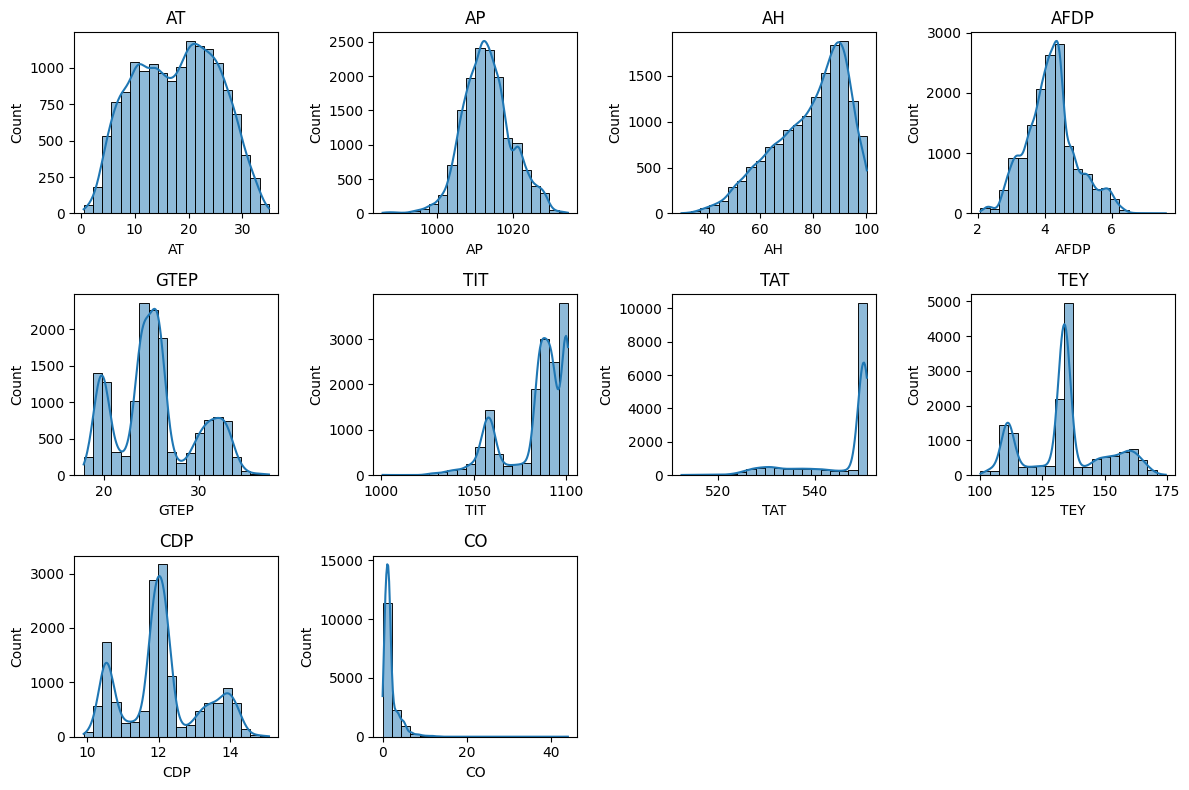

In [32]:
#Univariate Analysis - Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

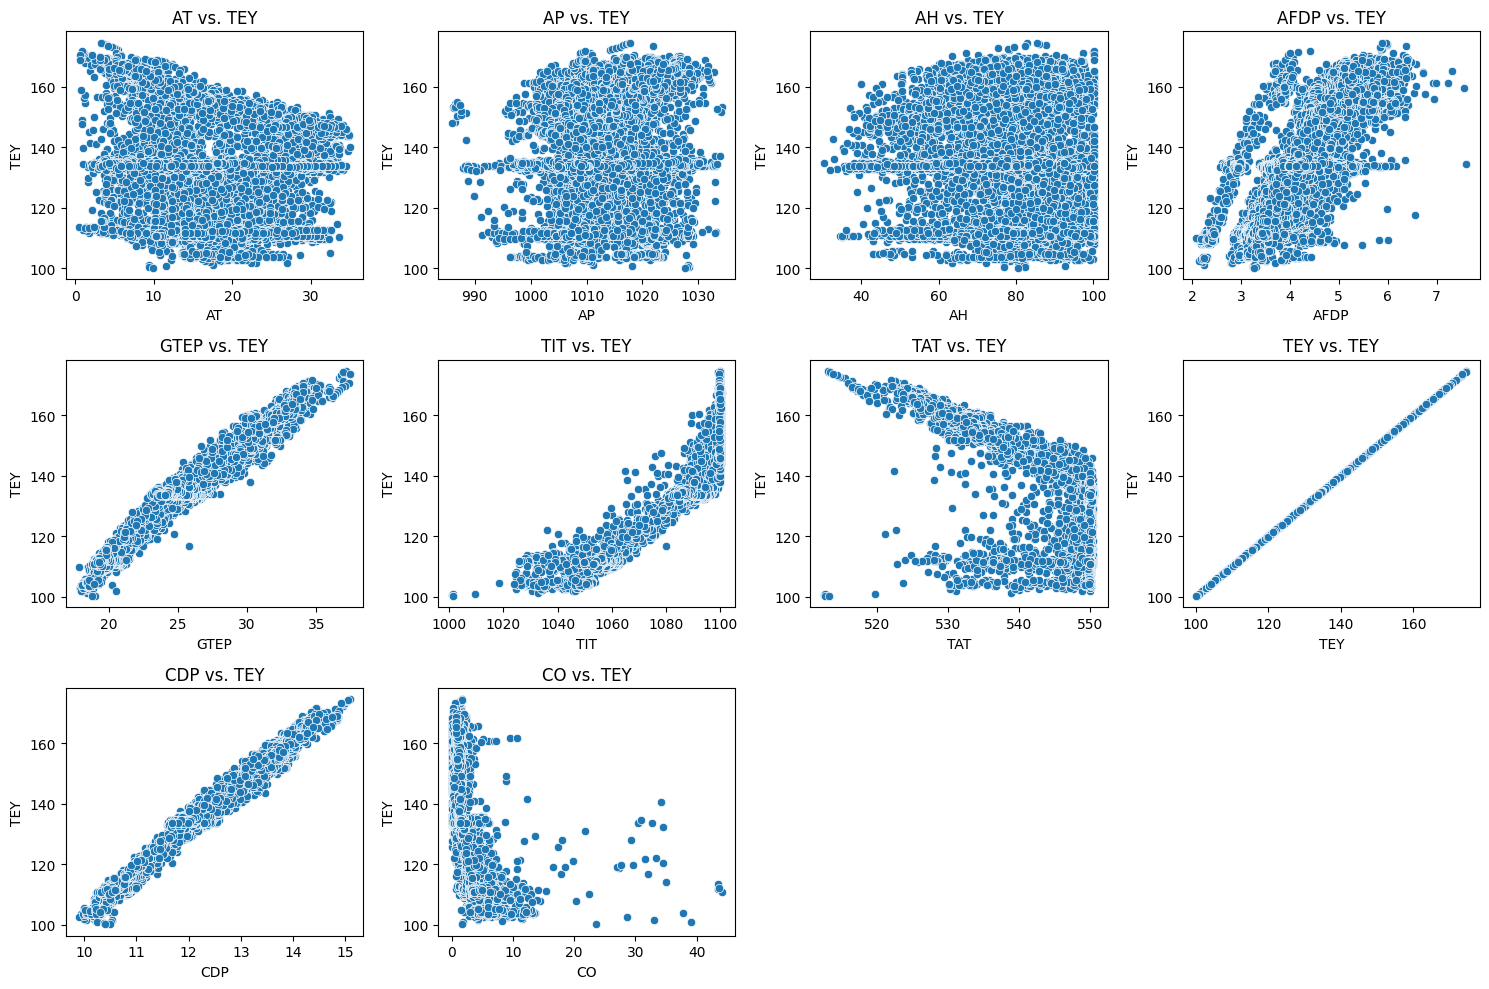

In [33]:
#Bivariate Analysis - Scatter Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=col, y='TEY', data=df)
    plt.title(f"{col} vs. TEY")
plt.tight_layout()
plt.show()

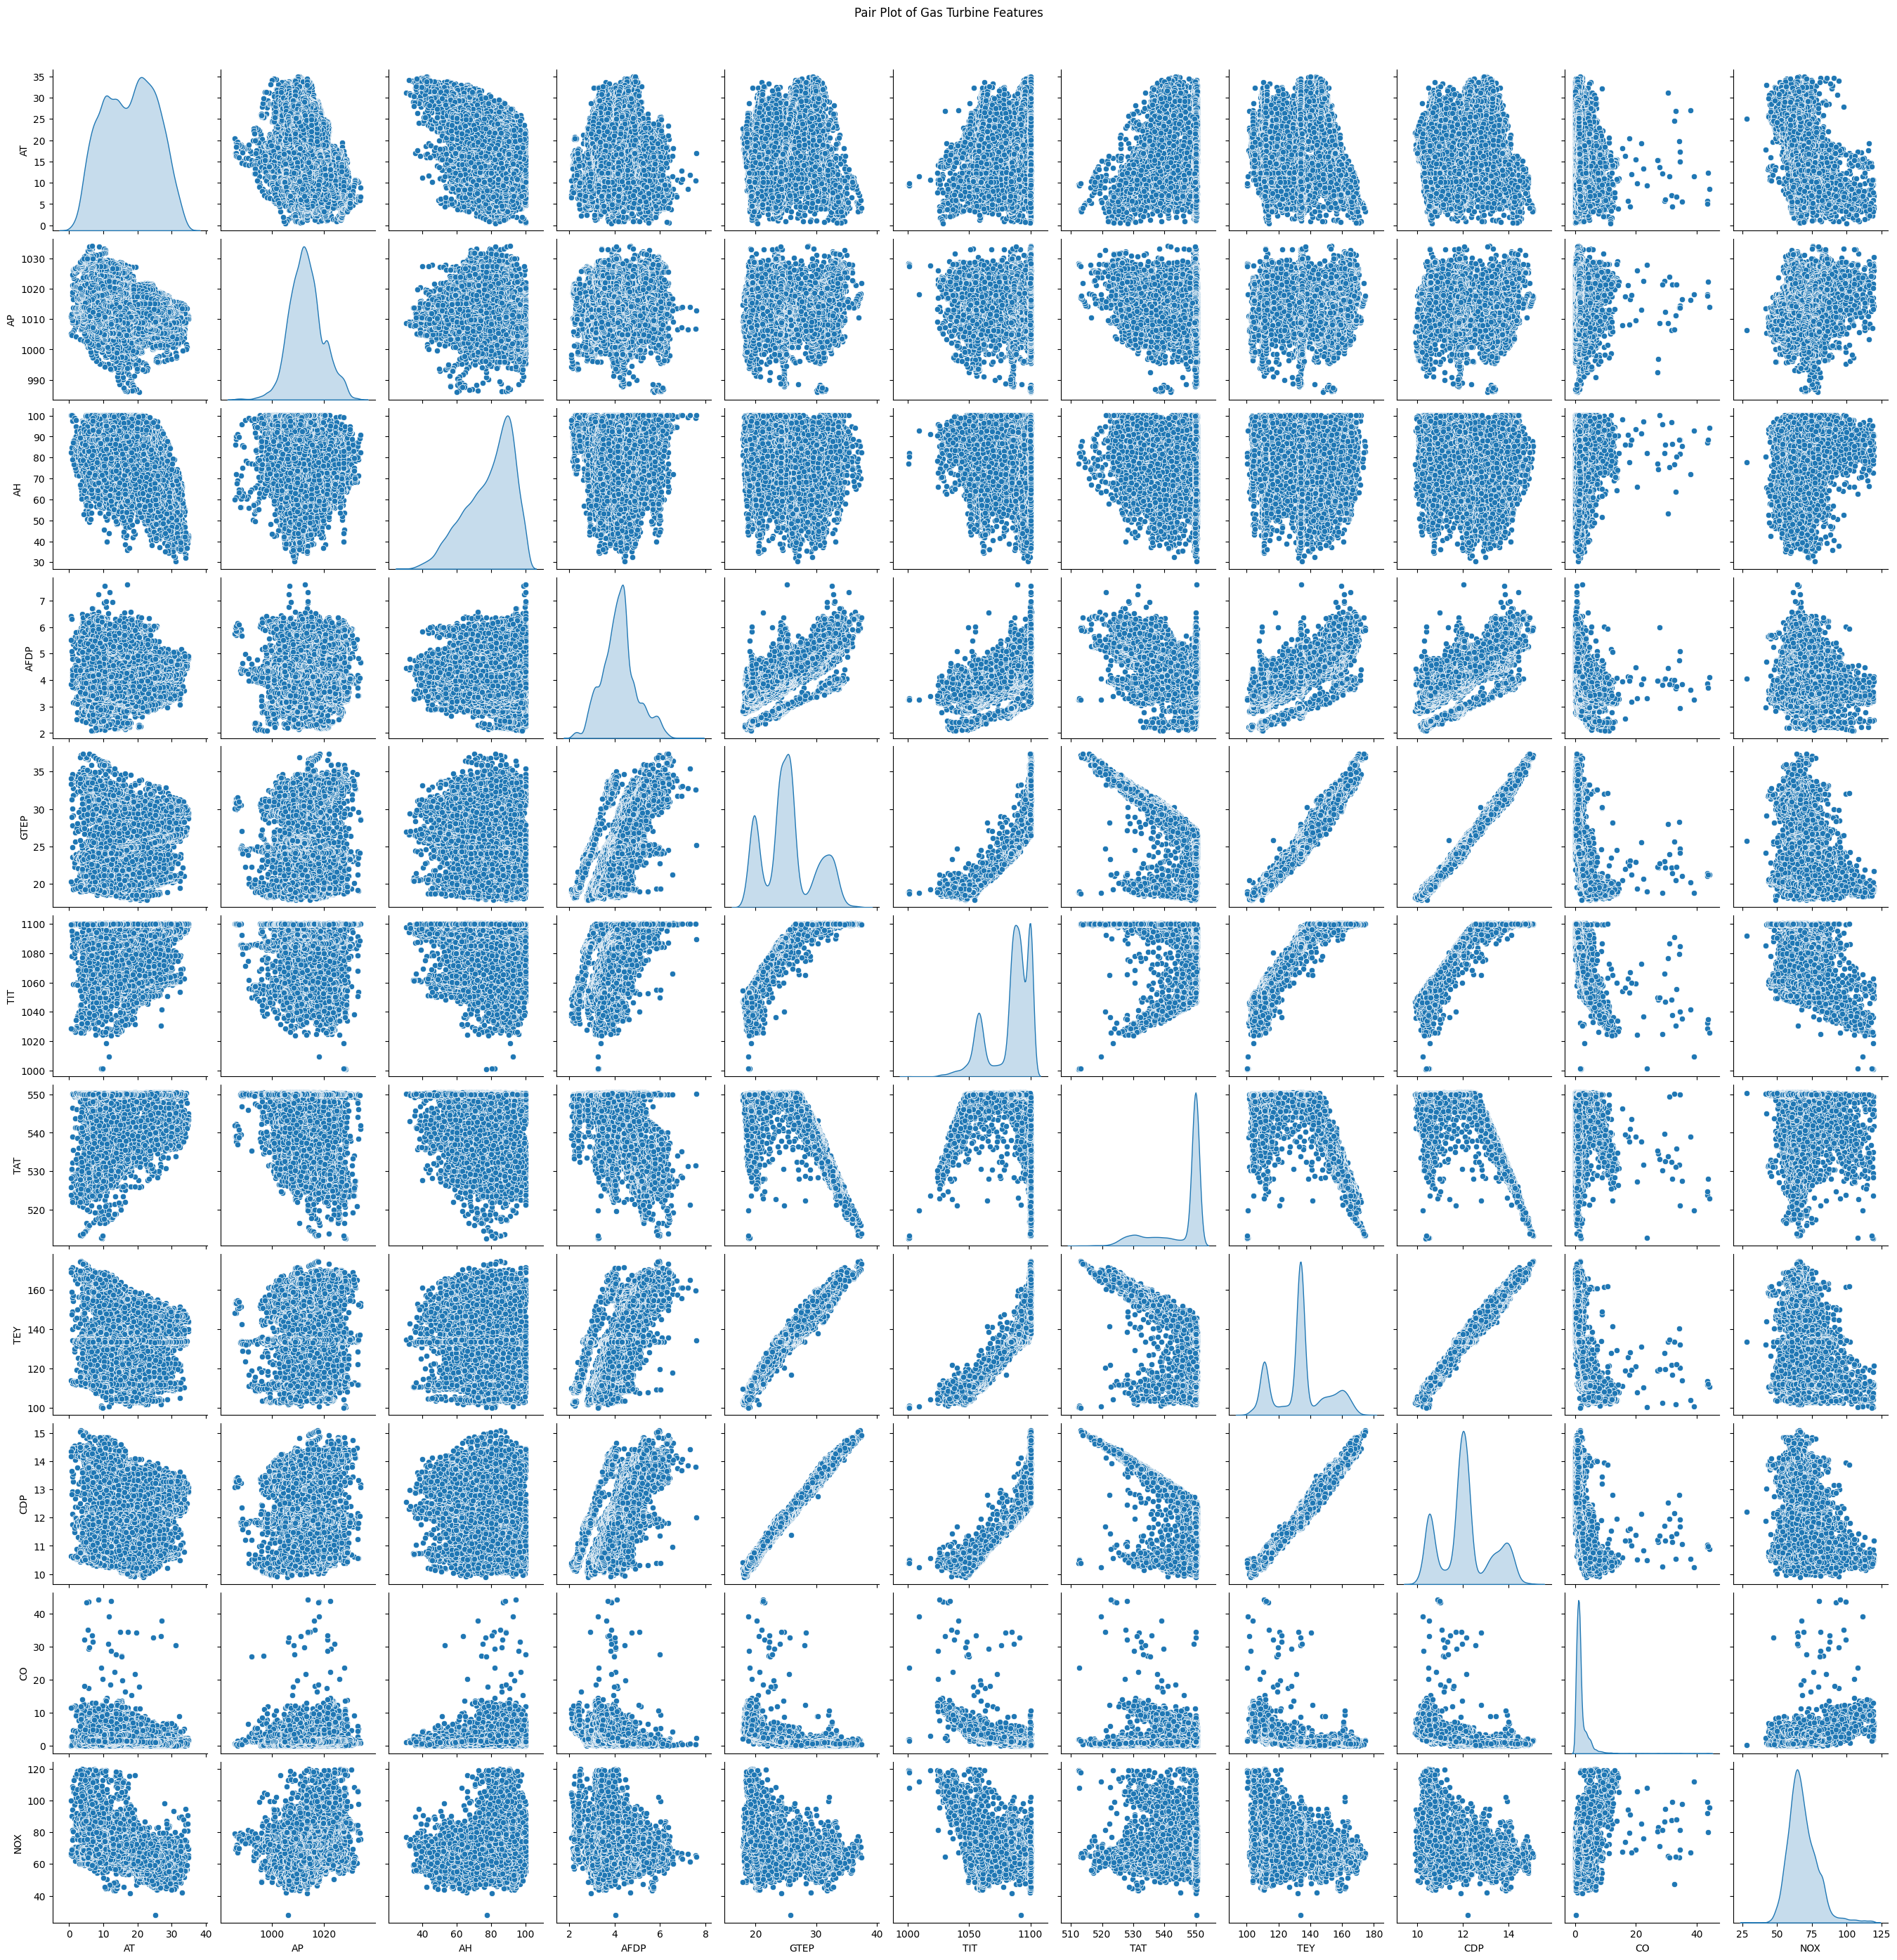

In [34]:
#Multivariate Analysis - Pair Plot
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plot of Gas Turbine Features", y=1.02)
plt.show()

Insights

The correlation matrix heatmap shows that turbine energy yield [TEY] has a strong positive correlation with turbine inlet temperature [TIT] and a moderate positive correlation with gas turbine exhaust pressure [GTEP] and compressor discharge pressure [CDP]. This indicates that these variables might be important predictors of TEY.

The histograms reveal that most of the sensor measurements have a somewhat normal distribution, except for carbon monoxide [CO] and nitrogen oxides [NOx], which are right-skewed.

In the scatter plots, we see that TIT, GTEP, and CDP show some linear relationship with TEY, suggesting that these variables could be influential in predicting TEY.

The pair plot confirms the observations from the correlation matrix and scatter plots, showing clear relationships between TIT, GTEP, CDP, and TEY. Additionally, it highlights the need for scaling, as the variables have different scales.

Overall, the insights suggest that ambient variables, particularly TIT, GTEP, and CDP, are crucial in predicting turbine energy yield. The LSTM model's low mean squared error further validates the model's ability to predict TEY accurately using these ambient variables.